In [302]:
import sklearn,math, itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
import time


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [303]:
# data = pd.read_csv("evaluations.csv")

x_test = pd.read_csv("../evaluation/X_test.csv")


x_test = x_test[x_test["winner"] != "Draw"]
y_test = x_test["winner"] != "Black"
x_test = x_test[x_test.columns[4:]]


data = pd.read_csv("../evaluation/X_train.csv")

print(len(data[data["fen"].duplicated()]["fen"].unique()))
data = data.drop_duplicates(subset=['fen'], keep='last').reset_index(drop=True)
len(data)




# y_train = X_train["winner"].copy()
# X_train = X_train[X_train.columns[4:]]
#dropping outliers (3 std above mean)
#dropping draws
#boolean variables?
#dropping opening and endgame
#visualize distributions
#balance classes => makes predicitons equal 



3161


136596

In [304]:
len(x_test)

25422

In [305]:

# for col in data.columns:
#     if col[0]=="B":
#         data[col] = -1 * data[col]
# data.describe()


In [306]:
# feature_cols = data.columns[4:]
# print(len(data))

###########
#handling outliers
###########
# clean_cols = []
# for col in feature_cols:
#     if col[0] !="D":
#         clean_cols.append(col)
# clean_cols.append("total moves")
# for col in clean_cols:
#     std = data[col].std()
#     avg = data[col].mean()
#     upper = avg + (3 * std)
#     lower = avg - (3 * std)
#     data = data[data[col] < upper]
#     data = data[data[col] > lower]

# print(len(data))
# data.describe()

In [307]:
##dropping duplicate fens, keeping one


In [308]:
# total = len(data)
# print(len(data))
# data = data[data["winner"] != "Draw"]
# print(len(data))


# data = data[data["move number"] > 5]
# # print(len(clean_data)/total)
# data = data[(data["move number"] / data["total moves"]) < 0.8]
# print(len(clean_data)/total)
# clean_data = clean_data[clean_data["total moves"] < 200]
# print(len(clean_data)/total)
# clean_data = clean_data[clean_data["total moves"] > 20]
# print(len(clean_data)/total)

# data = clean_data.sample(10000)

# data_winning = data[data["winner"]=="White"]
# data_not_winning = data[data["winner"]!="White"]

# data_winning = data_winning.sample(10000)
# data_not_winning = data_not_winning.sample(10000)

# data = data_winning.append(data_not_winning)
# data = data.reset_index(drop=True)


# data = clean_data

In [309]:
data

,fen,winner,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
0,rnb2rk1/ppq1bppp/4pn2/2P5/2N5/6P1/PP2PPBP/RNBQ...,Draw,52,156,38,2,3983,1,4,0,...,3894,0,3,0,35,1,1,0,2,1
1,1rbr1bk1/ppq2ppp/4pn2/8/2N5/1N2Q1P1/PP2PPBP/2R...,Draw,155,156,34,2,3561,1,4,0,...,3575,0,4,0,42,1,1,0,4,1
2,1rbrk3/pp2bppp/4pn2/N3N3/1P6/P5P1/4PPBP/2RR2K1...,Draw,50,156,25,2,2580,1,5,0,...,2542,0,3,0,27,1,1,0,6,0
3,1rbRk3/pp2b1pp/1n2pp2/N3N3/1P6/P5P1/4PPBP/2R2K...,Draw,16,156,25,2,2562,1,5,0,...,2001,0,2,0,2,1,1,0,9,0
4,1rbbk3/pp4pp/1n2pp2/N7/1P6/P2N2P1/4PPBP/2R2K2 ...,Draw,125,156,20,2,2007,1,3,0,...,1973,0,2,0,20,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136591,rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR ...,Black,1,56,39,1,3927,0,4,0,...,3892,0,0,0,20,1,0,0,0,1
136592,rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBN...,Black,7,56,39,1,3927,0,4,0,...,3928,0,2,0,28,1,0,0,0,1
136593,rnbqk2r/ppp2ppp/4pn2/3p4/1bPP4/5N2/PP1NPPPP/R1...,Black,0,56,39,1,3996,0,6,0,...,3998,0,4,0,20,1,0,3,4,1
136594,r1bq1rk1/1p1nbppp/1Pp2n2/p1Ppp3/Q2P4/PN2PN2/1B...,Black,24,56,39,1,4046,1,4,0,...,4105,0,8,0,23,1,0,0,3,1


In [310]:
data_win = data[data["winner"] == "White"]
print(len(data_win))
data_lose = data[data["winner"] == "Black"]
print(len(data_lose))
data_draw = data[data["winner"] == "Draw"]
print(len(data_draw))

data_win = data_win.sample(25000)

data_lose = data_lose.sample(25000)

data = data_win.append(data_lose)
data.reset_index(drop=True)

51675
41132
43789


,fen,winner,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
0,6k1/2Q2pp1/pp1Pb1qp/1p6/4P2r/3K4/PP3RP1/1B6 w ...,White,15,97,22,2,2284,0,5,1,...,2409,0,2,0,38,0,1,1,3,1
1,8/8/2r3p1/8/4k3/8/PP4P1/1K3R2 b - - 0 42,White,66,93,8,1,768,0,0,0,...,546,0,5,0,18,0,1,0,0,0
2,r1k1b3/ppp1q1pp/3p4/P1PPrp2/1R6/5B2/1P1Q1PP1/R...,White,0,59,28,2,2918,1,5,0,...,2871,0,5,0,45,0,1,0,2,1
3,rnb2k1r/pp2npp1/4p3/3pP1BN/3P3p/P7/2P1BPPP/R3K...,White,18,93,26,2,2623,0,5,0,...,2476,0,4,0,22,0,1,0,3,0
4,3n4/5p2/4k1p1/1p4Pp/2N1PP1P/4K3/1P6/8 w - - 0 43,White,75,107,8,2,733,0,6,0,...,618,0,2,0,16,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,r1bq1rk1/ppp2p2/2np1n1p/1Bb1p1p1/4P3/2PP1NB1/P...,Black,34,102,39,1,4056,0,6,0,...,4062,0,6,0,37,1,0,0,2,1
49996,2r5/3r1qkp/pQ2bpp1/1p2p3/8/1PP1N2P/1P1R1PP1/3R...,Black,54,112,28,2,2883,0,2,0,...,2869,0,5,1,43,0,1,0,8,1
49997,r1bq1rk1/pppnppbp/n2p2p1/4P3/3P1P2/2NB1N2/PPP3...,Black,64,74,39,1,4043,0,8,0,...,4008,1,1,0,42,1,0,0,1,1
49998,3k4/8/3Ppp2/1p6/4PPB1/4K1P1/rnp4p/4R3 w - - 0 42,Black,35,91,12,3,1239,0,6,0,...,1210,0,2,0,23,0,1,0,0,0


In [311]:
diff_cols = []
for col in data.columns:
    if col[0] == "D":
        diff_cols.append(col)


In [312]:
diff_cols

['DIFF_material sum',
 'DIFF_pawn control',
 'DIFF_piece squares sum',
 'DIFF_diagonal control',
 'DIFF_center control',
 'DIFF_doubled pawns',
 'DIFF_mobility',
 'DIFF_both bishops',
 'DIFF_not all pawns',
 'DIFF_pinned evaluation',
 'DIFF_attacker evalutation',
 'DIFF_has queen']

In [313]:
data_win[diff_cols].describe()

,DIFF_material sum,DIFF_pawn control,DIFF_piece squares sum,DIFF_diagonal control,DIFF_center control,DIFF_doubled pawns,DIFF_mobility,DIFF_both bishops,DIFF_not all pawns,DIFF_pinned evaluation,DIFF_attacker evalutation,DIFF_has queen
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.0,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.442720,-0.016320,69.559080,-0.044800,0.954080,-0.008480,0.0,0.029800,0.002560,0.038840,0.092880,0.011800
std,1.676744,0.734463,189.057161,0.791466,2.686429,0.497371,0.0,0.433358,0.162956,0.916911,3.378187,0.177713
min,-12.000000,-3.000000,-1149.000000,-3.000000,-10.000000,-3.000000,0.0,-1.000000,-1.000000,-9.000000,-17.000000,-1.000000
25%,0.000000,0.000000,-9.000000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,-2.000000,0.000000
50%,0.000000,0.000000,47.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,131.000000,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,0.000000
max,25.000000,3.000000,2777.000000,3.000000,11.000000,2.000000,0.0,1.000000,1.000000,12.000000,18.000000,2.000000


In [314]:
data_lose.describe()

,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,W_mobility,W_both bishops,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
count,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,48.302880,97.387600,25.946360,2.04784,2681.532360,0.337800,4.604640,0.146080,31.45668,0.378040,...,2730.808760,0.454080,4.277240,0.124760,31.45668,0.405400,0.861600,0.177200,3.672040,0.695160
std,33.515944,33.454128,10.733339,0.69008,1148.725297,0.554133,2.043609,0.370548,11.45828,0.484907,...,1094.351888,0.602782,1.787363,0.345137,11.45828,0.490979,0.345326,0.770288,3.368925,0.460957
min,0.000000,15.000000,0.000000,0.00000,-56.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,30.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,74.000000,17.000000,2.00000,1724.000000,0.000000,3.000000,0.000000,26.00000,0.000000,...,1803.000000,0.000000,3.000000,0.000000,26.00000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,44.000000,92.000000,28.500000,2.00000,2932.000000,0.000000,5.000000,0.000000,33.00000,0.000000,...,2971.000000,0.000000,4.000000,0.000000,33.00000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,68.000000,116.000000,35.000000,2.00000,3682.000000,1.000000,6.000000,0.000000,39.00000,1.000000,...,3674.250000,1.000000,6.000000,0.000000,39.00000,1.000000,1.000000,0.000000,5.000000,1.000000
max,246.000000,256.000000,39.000000,4.00000,4215.000000,3.000000,12.000000,3.000000,65.00000,1.000000,...,4209.000000,3.000000,12.000000,2.000000,65.00000,1.000000,1.000000,12.000000,27.000000,2.000000


In [315]:
data_win.describe()

,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,W_mobility,W_both bishops,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,47.313960,95.182960,26.671280,2.026640,2770.890200,0.371360,4.914920,0.12760,31.774120,0.414280,...,2701.331120,0.416160,3.960840,0.136080,31.774120,0.384480,0.869760,0.126440,3.578600,0.702720
std,33.736673,34.576968,10.171667,0.730227,1089.118005,0.577811,1.990799,0.34797,11.411064,0.492607,...,1132.604807,0.579055,1.768771,0.359621,11.411064,0.486482,0.336574,0.605366,3.293098,0.457507
min,0.000000,15.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,-65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,71.000000,18.000000,2.000000,1860.000000,0.000000,3.000000,0.00000,26.000000,0.000000,...,1762.000000,0.000000,3.000000,0.000000,26.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,42.000000,89.000000,29.000000,2.000000,3076.500000,0.000000,5.000000,0.00000,34.000000,0.000000,...,3007.000000,0.000000,4.000000,0.000000,34.000000,0.000000,1.000000,0.000000,3.000000,1.000000
75%,67.000000,113.000000,35.000000,2.000000,3691.000000,1.000000,6.000000,0.00000,40.000000,1.000000,...,3664.000000,1.000000,5.000000,0.000000,40.000000,1.000000,1.000000,0.000000,5.000000,1.000000
max,277.000000,295.000000,39.000000,4.000000,4226.000000,3.000000,12.000000,2.00000,69.000000,1.000000,...,4238.000000,3.000000,11.000000,3.000000,69.000000,1.000000,1.000000,9.000000,25.000000,2.000000


In [316]:
data_draw.describe()

,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,W_mobility,W_both bishops,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
count,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000,...,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000,43789.000000
mean,50.609422,100.728334,24.763525,1.994222,2559.270821,0.349037,4.628308,0.133550,30.324922,0.368814,...,2547.694352,0.402316,4.010779,0.118295,30.324922,0.363927,0.874923,0.126539,3.258056,0.622188
std,38.466391,44.391326,11.198491,0.721265,1198.422896,0.562348,2.024922,0.355213,11.482648,0.482489,...,1194.097669,0.571574,1.795336,0.338497,11.482648,0.481133,0.330810,0.634954,3.169448,0.484987
min,0.000000,10.000000,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,71.000000,14.000000,2.000000,1425.000000,0.000000,3.000000,0.000000,24.000000,0.000000,...,1412.000000,0.000000,3.000000,0.000000,24.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,43.000000,95.000000,27.000000,2.000000,2782.000000,0.000000,5.000000,0.000000,32.000000,0.000000,...,2778.000000,0.000000,4.000000,0.000000,32.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,72.000000,123.000000,35.000000,2.000000,3663.000000,1.000000,6.000000,0.000000,39.000000,1.000000,...,3648.000000,1.000000,5.000000,0.000000,39.000000,1.000000,1.000000,0.000000,5.000000,1.000000
max,429.000000,456.000000,39.000000,4.000000,4214.000000,3.000000,11.000000,3.000000,64.000000,1.000000,...,4221.000000,3.000000,11.000000,4.000000,64.000000,1.000000,1.000000,10.000000,25.000000,2.000000


In [317]:
data.describe()

,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,W_mobility,W_both bishops,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,47.808420,96.285280,26.308820,2.037240,2726.21128,0.354580,4.759780,0.136840,31.615400,0.396160,...,2716.06994,0.435120,4.119040,0.130420,31.615400,0.394940,0.865680,0.15182,3.625320,0.698940
std,33.629788,34.037695,10.462451,0.710509,1120.19869,0.566339,2.023313,0.359552,11.435684,0.489103,...,1113.72900,0.591335,1.785098,0.352496,11.435684,0.488843,0.340999,0.69321,3.331522,0.459246
min,0.000000,15.000000,0.000000,0.000000,-56.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-65.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,21.000000,73.000000,18.000000,2.000000,1788.00000,0.000000,3.000000,0.000000,26.000000,0.000000,...,1785.00000,0.000000,3.000000,0.000000,26.000000,0.000000,1.000000,0.00000,1.000000,0.000000
50%,43.000000,90.000000,29.000000,2.000000,2999.00000,0.000000,5.000000,0.000000,34.000000,0.000000,...,2989.00000,0.000000,4.000000,0.000000,34.000000,0.000000,1.000000,0.00000,3.000000,1.000000
75%,68.000000,114.250000,35.000000,2.000000,3686.00000,1.000000,6.000000,0.000000,39.000000,1.000000,...,3669.00000,1.000000,5.000000,0.000000,39.000000,1.000000,1.000000,0.00000,5.000000,1.000000
max,277.000000,295.000000,39.000000,4.000000,4226.00000,3.000000,12.000000,3.000000,69.000000,1.000000,...,4238.00000,3.000000,12.000000,3.000000,69.000000,1.000000,1.000000,12.00000,27.000000,2.000000


In [318]:
feature_cols = data.columns[4:]

target = data["winner"] != "Black"



features = data[feature_cols]
scaler =  MinMaxScaler()
features_transformed = scaler.fit_transform(features)
features = pd.DataFrame(features_transformed, columns=features.columns)


x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=features.columns)

x_train = features
y_train = target





# x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle=True, test_size=0.15)

In [319]:
# fig, axs = plt.subplots(9, 4, figsize=(100, 100))

# for i in range(len(feature_cols)):
#     sns.distplot(features[feature_cols[i]], ax=axs.flat[i])
# #     sns.distplot(features[plot_cols[i]])
# plt.show()

In [320]:

# from sklearn.feature_selection import RFE
# # X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
# # estimator = DecisionTreeClassifier(max_depth=5)
# # estimator = sklearn.ensemble.ExtraTreesClassifier(n_estimators=100, n_jobs=-1)
# # estimator = KerasClassifier(build_fn=create_baseline, epochs=200, batch_size=50, verbose=2)


# estimator = LogisticRegression(solver='saga', tol=1e-2, max_iter=200)
# selector = RFE(estimator, n_features_to_select=15, step=1)
# selector = selector.fit(x_train, y_train)
# selector.support_
# print(selector.ranking_)
# new_features = []
# support = selector.support_
# for i in range(len(features.columns)):
#     if support[i]:
#         new_features.append(features.columns[i])
# print(new_features)

# x_train = x_train[new_features]
# x_test = x_test[new_features]
# # x_train, x_test, y_train, y_test = train_test_split(features_transformed, target, test_size=0.25, random_state=0)

In [321]:
x_train.describe()

,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,W_mobility,W_both bishops,W_not all pawns,W_pinned evaluation,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.674585,0.509310,0.649746,0.118193,0.396648,0.045613,0.458194,0.396160,0.87112,0.012787,...,0.646310,0.145040,0.343253,0.043473,0.458194,0.394940,0.865680,0.012652,0.134271,0.349470
std,0.268268,0.177627,0.261606,0.188780,0.168609,0.119851,0.165735,0.489103,0.33507,0.055549,...,0.258826,0.197112,0.148758,0.117499,0.165735,0.488843,0.340999,0.057768,0.123390,0.229623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461538,0.500000,0.430640,0.000000,0.250000,0.000000,0.376812,0.000000,1.00000,0.000000,...,0.429933,0.000000,0.250000,0.000000,0.376812,0.000000,1.000000,0.000000,0.037037,0.000000
50%,0.743590,0.500000,0.713452,0.000000,0.416667,0.000000,0.492754,0.000000,1.00000,0.000000,...,0.709737,0.000000,0.333333,0.000000,0.492754,0.000000,1.000000,0.000000,0.111111,0.500000
75%,0.897436,0.500000,0.873891,0.333333,0.500000,0.000000,0.565217,1.000000,1.00000,0.000000,...,0.867767,0.333333,0.416667,0.000000,0.565217,1.000000,1.000000,0.000000,0.185185,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [322]:
# # opt = keras.optimizers.Adam(learning_rate=0.001)
# opt = keras.optimizers.Adam(learning_rate=0.001)


# def create_baseline():
#     # create model
#     model = Sequential()
#     model.add(Dense(32, input_dim=17, activation='relu'))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(1, activation='sigmoid'))
#     # Compile model
    
    
#     model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])
#     return model

In [323]:
# estimator = KerasClassifier(build_fn=create_baseline, epochs=300, batch_size=10, verbose=2)
# kfold = StratifiedKFold(n_splits=10, shuffle=True)
# results = cross_val_score(estimator, x_train, y_train, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [324]:
# estimators = [
#     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
#     ('svr', make_pipeline(StandardScaler(),
#                           LinearSVC(random_state=42)))
# ]
# clf = StackingClassifier(
#     estimators=estimators, final_estimator=LogisticRegression()
# )
# plit

# clf.fit(X_train, y_train).score(X_test, y_test)

In [325]:
# estimator = KerasClassifier(build_fn=create_baseline, epochs=500, batch_size=50, verbose=2)

from sklearn.ensemble import StackingClassifier
from sklearn import svm
estimator_lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200)
estimator_rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, max_features=None)
estimator_et = sklearn.ensemble.ExtraTreesClassifier(n_estimators=150, n_jobs=-1, max_features=None)
estimator_nn = KNeighborsClassifier()
estimators = [("lr",estimator_lr), ("rf", estimator_rf), ("et",estimator_et)]

# clf = StackingClassifier(
#     estimators=estimators, final_estimator=LogisticRegression(solver='saga', tol=1e-2, max_iter=200), n_jobs = -1
# )
clf = estimator_et
clf.fit(x_train, y_train)

ExtraTreesClassifier(max_features=None, n_estimators=150, n_jobs=-1)

In [326]:
# import pickle
# s = pickle.dumps(clf)
# clf2 = pickle.loads(s)
# # clf2.predict(x_)

# y[0]

In [327]:
# from joblib import dump, load
# dump(clf, 'clf_superlite.joblib') 

In [328]:
# kfold = KFold(n_splits=5, shuffle=True)


# scores = cross_val_score(estimator=estimator_lr, X=x_train, y=y_train, cv=kfold)

# scores.mean()


In [329]:
# x = [ not val for val in y_train]

# sum(x)/len(y_train)

In [330]:
estimator = clf
train_acc = estimator.score(x_train, y_train)
print(train_acc)

0.99904


In [331]:
import random

In [332]:
sum([random.random() > 0.5 for i in range(10000)])/10000

0.4968

In [333]:
# assert len(x_train) + len(x_test) == len(data) == len(features)

In [334]:
# features = data[feature_cols]
# scaler =  MinMaxScaler()


In [335]:
# x_test

In [336]:
test_acc = estimator.score(x_test, y_test)
print(test_acc)

0.6434190858311698


In [337]:
# ((len(x_train) * train_acc) + (len(x_test) * test_acc))/ len(data)

In [338]:
y_pred = estimator.predict(x_test)
y_true = list(y_test)

Normalized confusion matrix


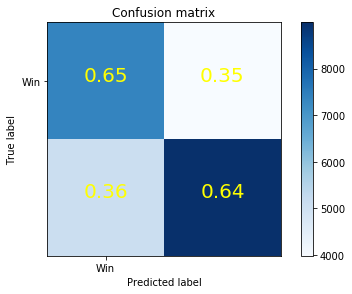

In [339]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                 horizontalalignment="center",
                 color="yellow" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
plot_confusion_matrix(metrics.confusion_matrix(y_true, y_pred), classes=["Win"])

In [340]:
# scaler =  MinMaxScaler()
# draws = data_draw[feature_cols]
# draws_transformed = scaler.fit_transform(draws)
# features_draw = pd.DataFrame(features_transformed, columns=features.columns)


In [341]:
# sum(estimator.predict(features_draw))/len(features)

In [342]:
def matrix_metrix(y_true, y_pred):
    CM = metrics.confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    Population = TN + FN + TP + FP
    Prevalence = round((TP + FP) / Population, 3)
    Accuracy = round((TP + TN) / Population, 3)
    Precision = round(TP / (TP + FP), 3)
    NPV = round(TN / (TN + FN), 3)
    FDR = round(FP / (TP + FP), 3)
    FOR = round(FN / (TN + FN), 3)
    check_Pos = Precision + FDR
    check_Neg = NPV + FOR
    Recall = round(TP / (TP + FN), 3)
    FPR = round(FP / (TN + FP), 3)
    Specificity = 1 - FPR
    FNR = round(FN / (TP + FN), 3)
    TNR = round(TN / (TN + FP), 3)
    check_Pos2 = Recall + FNR
    check_Neg2 = FPR + TNR
    LRPos = round(Recall / FPR, 3)
    LRNeg = round(FNR / TNR, 3)
    DOR = round(LRPos / LRNeg)
    F1 = round(2 * ((Precision * Recall) / (Precision + Recall)), 4)
    F2 = round((1 + 2 ** 2) * ((Precision * Recall) / ((2 ** 2 * Precision) + Recall)), 4)
    MCC = -1
#     MCC = round(((TP * TN) - (FP * FN)) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)), 4)
    BM = Recall + TNR - 1
    MK = Precision + NPV - 1
#     AUC = round(metrics.roc_auc_score(y_true, prediction), 3)

    met_dict = {
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'Prevalence': Prevalence,
        'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall,
        'F1': F1, 'F2': F2,
        # 'AUC':AUC,
        'NPV': NPV, 'FPR': FPR,
        'TNR': Specificity, 'FNR': FNR, 'TNR': TNR, 'FDR': FDR, 'FOR': FOR, 'check_Pos': check_Pos,
        'check_Neg': check_Neg, 'check_Pos2': check_Pos2, 'check_Neg2': check_Neg2, 'LR+': LRPos,
        'LR-': LRNeg, 'DOR': DOR, 'MCC': MCC, 'BM': BM, 'MK': MK
    }

    return met_dict
matrix_metrix(y_true, y_pred)

{'TP': 8993,
 'TN': 7364,
 'FP': 3981,
 'FN': 5084,
 'Prevalence': 0.51,
 'Accuracy': 0.643,
 'Precision': 0.693,
 'Recall': 0.639,
 'F1': 0.6649,
 'F2': 0.6491,
 'NPV': 0.592,
 'FPR': 0.351,
 'TNR': 0.649,
 'FNR': 0.361,
 'FDR': 0.307,
 'FOR': 0.408,
 'check_Pos': 1.0,
 'check_Neg': 1.0,
 'check_Pos2': 1.0,
 'check_Neg2': 1.0,
 'LR+': 1.821,
 'LR-': 0.556,
 'DOR': 3.0,
 'MCC': -1,
 'BM': 0.28800000000000003,
 'MK': 0.2849999999999999}

In [343]:
def acc_with_thresh(x=x_test, y=y_test, thresh=0.25):
    probs = estimator.predict_proba(x_test)
    n = len(x)
    assert n == len(y)
    total = 0

    for i in range(n):
        prediction = probs[i][1] > thresh
#         print(probs[i][1], prediction, y_true[i])
        if prediction == y_true[i]:
            total+=1
    return total/n

In [344]:
acc_with_thresh()

0.6355518841947919

In [345]:
# data

In [346]:
# new_data  = pd.read_csv("evaluations.csv")
# x_new = new_data[data.columns[4:]]
# x_new
# y_true_new = list(new_data["winner"] == "White")

In [347]:
# scaler =  MinMaxScaler()
# new_data = scaler.fit_transform(x_new)
# new_data = pd.DataFrame(new_data, columns=features.columns)

In [348]:
# y_pred_new = list(estimator.predict(new_data))

In [349]:
# estimator.score(new_data, y_true_new) #factoring in draws its correct 50% of the time with draws

In [350]:
#next steps
#get more data, actually have a good test set

#save model 
#agent: max over proabbilities
#build an agent
#figure out how to elo
#play vs random agent, play vs stockfish 8, play vs medium


In [351]:
# clf_loaded = load('filename.joblib') 

In [352]:
# clf_loaded.score(x_test, y_test)

In [353]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [354]:
# # Create first pipeline for base without reducing features.

# pipe = Pipeline([('classifier' , RandomForestClassifier())])
# # pipe = Pipeline([('classifier', RandomForestClassifier())])

# # Create param grid.

# param_grid = [
#     {'classifier' : [LogisticRegression()],
#      'classifier__penalty' : ['l1', 'l2'],
#     'classifier__C' : np.logspace(-4, 4, 20),
#     'classifier__solver' : ['saga']},
#     {'classifier' : [RandomForestClassifier()],
#     'classifier__n_estimators' : list(range(10,101,10)),
#     'classifier__max_features' : list(range(6,32,5))}
# ]

# # Create grid search object

# clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# # Fit on data

# best_clf = clf.fit(x_train, y_train)

In [356]:
x_train.describe()

,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,W_mobility,W_both bishops,W_not all pawns,W_pinned evaluation,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.674585,0.509310,0.649746,0.118193,0.396648,0.045613,0.458194,0.396160,0.87112,0.012787,...,0.646310,0.145040,0.343253,0.043473,0.458194,0.394940,0.865680,0.012652,0.134271,0.349470
std,0.268268,0.177627,0.261606,0.188780,0.168609,0.119851,0.165735,0.489103,0.33507,0.055549,...,0.258826,0.197112,0.148758,0.117499,0.165735,0.488843,0.340999,0.057768,0.123390,0.229623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461538,0.500000,0.430640,0.000000,0.250000,0.000000,0.376812,0.000000,1.00000,0.000000,...,0.429933,0.000000,0.250000,0.000000,0.376812,0.000000,1.000000,0.000000,0.037037,0.000000
50%,0.743590,0.500000,0.713452,0.000000,0.416667,0.000000,0.492754,0.000000,1.00000,0.000000,...,0.709737,0.000000,0.333333,0.000000,0.492754,0.000000,1.000000,0.000000,0.111111,0.500000
75%,0.897436,0.500000,0.873891,0.333333,0.500000,0.000000,0.565217,1.000000,1.00000,0.000000,...,0.867767,0.333333,0.416667,0.000000,0.565217,1.000000,1.000000,0.000000,0.185185,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [361]:
x_test = pd.read_csv("../evaluation/X_test.csv")


x_test = x_test[x_test["winner"] != "Draw"]
y_test = x_test["winner"] != "Black"

In [365]:
 

def classify(x):
    winning = 0
    y_p =[]
#     samp = x.sample(10)
    for i, row in x.iterrows():
#         winning = 
#             row['DIFF_material sum'] - 
#             row['DIFF_pawn control'] +
#             row['DIFF_piece squares sum'] -
#             row['DIFF_piece squares sum'] 
#         print(row.dtype)
        for col in diff_cols:
#             print(col)
            
#             print(row[col])
            winning+=row[col]
        y_p.append(winning >= 0)
        winning = 0
    return y_p
            
        

In [375]:
diff_cols

['DIFF_material sum',
 'DIFF_pawn control',
 'DIFF_piece squares sum',
 'DIFF_diagonal control',
 'DIFF_center control',
 'DIFF_doubled pawns',
 'DIFF_mobility',
 'DIFF_both bishops',
 'DIFF_not all pawns',
 'DIFF_pinned evaluation',
 'DIFF_attacker evalutation',
 'DIFF_has queen']

In [377]:
 

def classify_new(x):
    winning = 0
    y_p =[]
    for i, row in x.iterrows():
        winning+= row['DIFF_material sum']
        winning-=row['DIFF_pawn control']
        winning+=row['DIFF_piece squares sum']
        winning-=row['DIFF_diagonal control']
        winning+=row['DIFF_center control']
        winning-=row['DIFF_doubled pawns']
#         row['DIFF_mobility']
        winning+=row['DIFF_both bishops']
        winning+=row['DIFF_not all pawns']
        winning+=row['DIFF_pinned evaluation']
        winning+=row['DIFF_attacker evalutation']
        winning+=row['DIFF_has queen']
    
    
    

            
        y_p.append(winning >= 0)
        winning = 0
    return y_p
            
        

In [400]:
 

def classify_new2(x):
    winning = 0
    y_p =[]
    for i, row in x.iterrows():
        winning+= (row['DIFF_material sum'] > 0)
        winning+= (row['DIFF_pawn control'] < 0)
        winning+= (row['DIFF_piece squares sum'] > 0)
        winning+= (row['DIFF_diagonal control'] < 0)
        winning+= (row['DIFF_center control'] > 0)
        winning+= (row['DIFF_doubled pawns'] < 0)
#         row['DIFF_mobility']
        winning+= (row['DIFF_both bishops'] > 0)
        winning+= (row['DIFF_not all pawns'] > 0)
        winning+= (row['DIFF_pinned evaluation'] > 0)
        winning+= (row['DIFF_attacker evalutation'] > 0)
        winning+= (row['DIFF_has queen'] > 0)
    

#         print(winning)
            
        y_p.append((winning/11) >= 0.12)
        winning = 0
    return y_p
            
        

In [401]:
predicted = classify_new2(x_test)

In [402]:
sum(predicted)/len(predicted)

0.7579655416568327

In [403]:
sklearn.metrics.accuracy_score(y_test, predicted)

0.6090000786720163

In [374]:
data[data["winner"] == "White"][diff_cols].describe()

,DIFF_material sum,DIFF_pawn control,DIFF_piece squares sum,DIFF_diagonal control,DIFF_center control,DIFF_doubled pawns,DIFF_mobility,DIFF_both bishops,DIFF_not all pawns,DIFF_pinned evaluation,DIFF_attacker evalutation,DIFF_has queen
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.0,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.442720,-0.016320,69.559080,-0.044800,0.954080,-0.008480,0.0,0.029800,0.002560,0.038840,0.092880,0.011800
std,1.676744,0.734463,189.057161,0.791466,2.686429,0.497371,0.0,0.433358,0.162956,0.916911,3.378187,0.177713
min,-12.000000,-3.000000,-1149.000000,-3.000000,-10.000000,-3.000000,0.0,-1.000000,-1.000000,-9.000000,-17.000000,-1.000000
25%,0.000000,0.000000,-9.000000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,-2.000000,0.000000
50%,0.000000,0.000000,47.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,131.000000,0.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,0.000000
max,25.000000,3.000000,2777.000000,3.000000,11.000000,2.000000,0.0,1.000000,1.000000,12.000000,18.000000,2.000000
